### BLACK FRIDAY ANALYSIS

In [ ]:
# Black Friday is a shopping holiday  that takes place on the day after Thanksgiving. 
# It is known for its deep discounts and special deals on a wide range of products, including electronics, home goods, clothing, and more.
# Many retailers offer special doorbuster deals and extended hours on Black Friday, and it is traditionally one of the busiest shopping days of the year. 
# The dataset that we are having contains 537578 rows and 12 columns.
# Our main goal will be to do various kind of analysis and get inferences which will be able to help to provide valuable insights on the market and hence will be beneficial for the company.


##### importing Libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

##### Loading dataset

In [3]:
df = pd.read_csv('BlackFriday.csv')
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


##### Dataset information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  int64  
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 49.2+ MB


##### checking null values

In [16]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

##### removing product categorie 2 & 3 columns

In [6]:
del df['Product_Category_2']
del df['Product_Category_3']


##### checking unique columns 

In [24]:
df['User_ID'].nunique() # here we can see how many unique users are there means some users are purchasing multiple products.

5891

In [25]:
df['Product_ID'].nunique()

3623

In [28]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [30]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [31]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [32]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [33]:
df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0], dtype=int64)

In [36]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [40]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [42]:
df['Purchase'].nunique()

17959

In [43]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [47]:
for column in df.columns:
    print(column, ":", df[column].nunique())
    

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


##### Assumptions

In [ ]:
1.Who is more likely to spend more on Black Friday i.e Man/Woman, Married/Unmarried, What age group
2.What type of products people purchase more i.e Category 1, 2 or 3
3.Who spent more i.e Old/New customer
4.From which area people spend more
5.From what type of occupation people spend more


##### Analysing Gender Column

<AxesSubplot:ylabel='Ratio'>

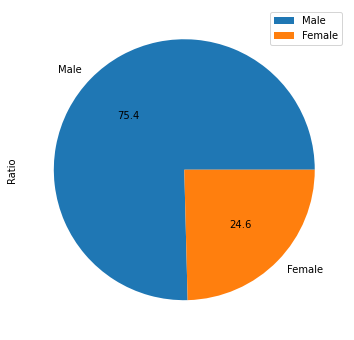

In [58]:

data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']) , len(df[df['Gender'] == 'F'])]}, index =['Male','Female'])


data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = '%.1f')

<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='None'>

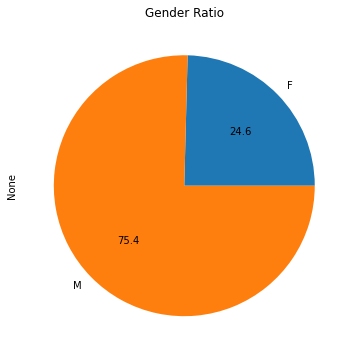

In [61]:
df.groupby('Gender').size().plot(kind = 'pie',
                                 title = 'Gender Ratio',
                                 autopct = "%.1f",
                                 figsize =(6,6))

<AxesSubplot:xlabel='Gender'>

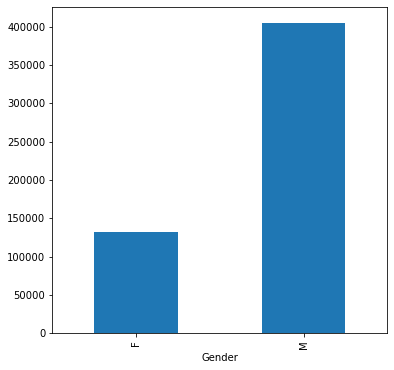

In [64]:
df.groupby('Gender').size().plot(kind = 'bar',                             
                                 figsize =(6,6))

<AxesSubplot:ylabel='Purchase'>

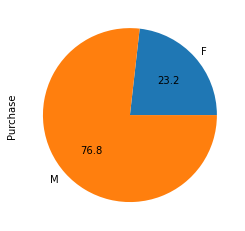

In [71]:
df.groupby('Gender').sum() ['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<AxesSubplot:ylabel='Purchase'>

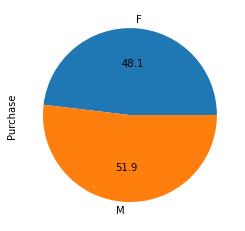

In [72]:
df.groupby('Gender').mean() ['Purchase'].plot(kind = 'pie', autopct = "%0.1f") #findind the mean of purchase respective genders

##### Average amount spend per product by Gender

<AxesSubplot:title={'center':'Purchase Disribution by Age'}, xlabel='Age'>

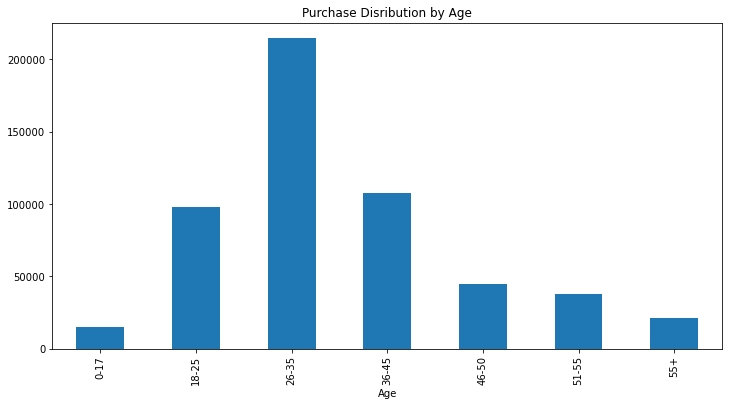

In [82]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12,6), title = 'Purchase Disribution by Age')

##### Analysing Unique products purchased by Age

In [19]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst , columns = ['Age','Products'])

<AxesSubplot:xlabel='Age'>

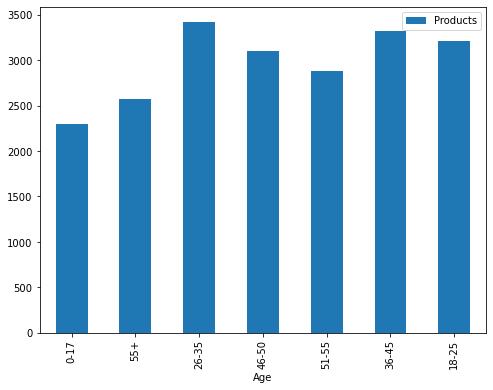

In [20]:
data.plot.bar(x = 'Age', figsize = (8,6))


##### Analysing amount spend by Age

<AxesSubplot:title={'center':'Amount Spend by Age'}, xlabel='Age'>

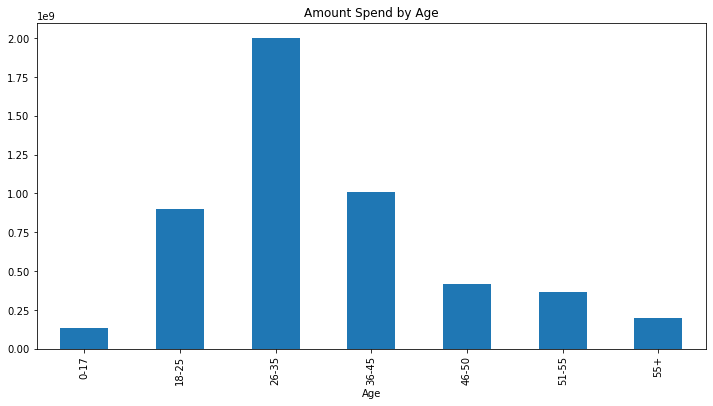

In [21]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')


##### Average amount spend by Age

<AxesSubplot:title={'center':'Amount Spend by Age'}, xlabel='Age'>

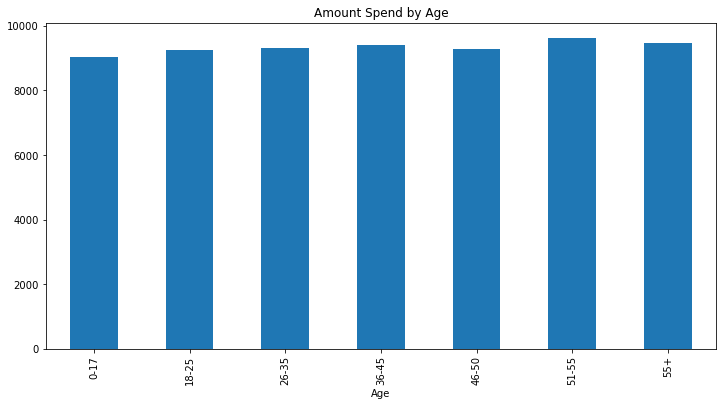

In [22]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')


##### Analysing Martial Status Distribution

<AxesSubplot:ylabel='None'>

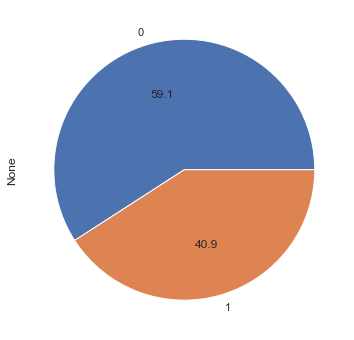

In [90]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

##### Analysing purchase by age with resp to Gender

<AxesSubplot:xlabel='Age', ylabel='count'>

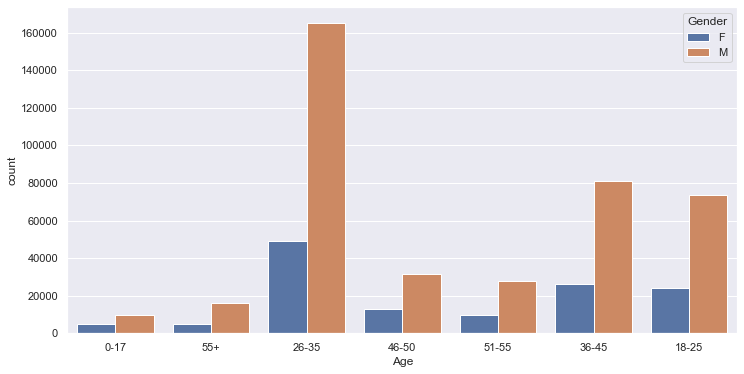

In [33]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot ( x ='Age',hue='Gender',data = df)

##### Analyse Martial status wrt Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

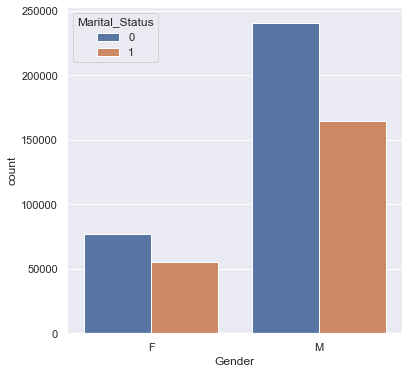

In [37]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot ( x ='Gender',hue='Marital_Status',data = df)

##### analyse purchase based on city category

<AxesSubplot:xlabel='City_Category', ylabel='count'>

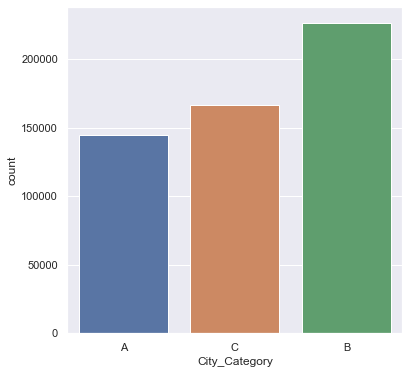

In [38]:
sns.countplot(x = df['City_Category'])


<AxesSubplot:ylabel='None'>

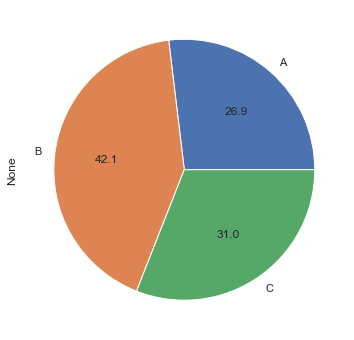

In [42]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')


##### analyse purchase city category wrt  Gender

<AxesSubplot:xlabel='City_Category', ylabel='count'>

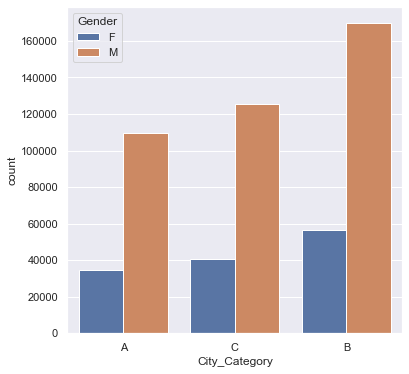

In [43]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)


##### total amount spend on products by city category

<AxesSubplot:ylabel='Purchase'>

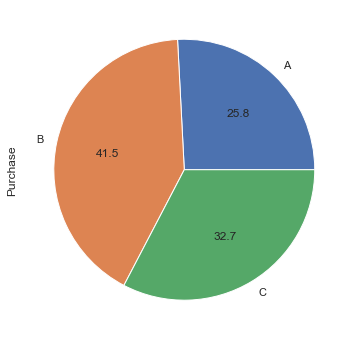

In [44]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")


##### Average amount spend on city category

<AxesSubplot:ylabel='Purchase'>

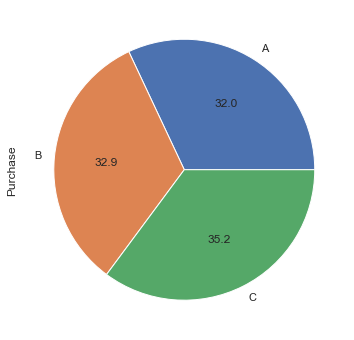

In [45]:
df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")


##### Analyse purchase by city category

<AxesSubplot:xlabel='City_Category', ylabel='count'>

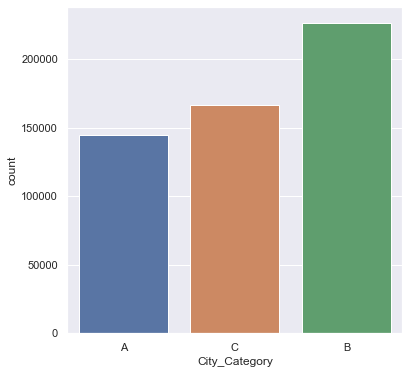

In [56]:
sns.countplot(x = df['City_Category'])


<AxesSubplot:xlabel='City_Category', ylabel='count'>

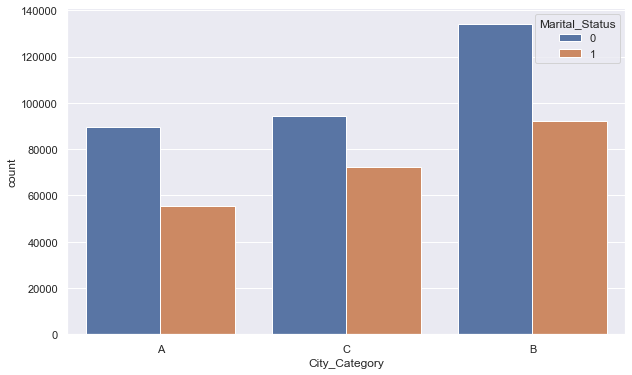

In [92]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x = 'City_Category', hue = 'Marital_Status', data = df)


<AxesSubplot:xlabel='City_Category', ylabel='count'>

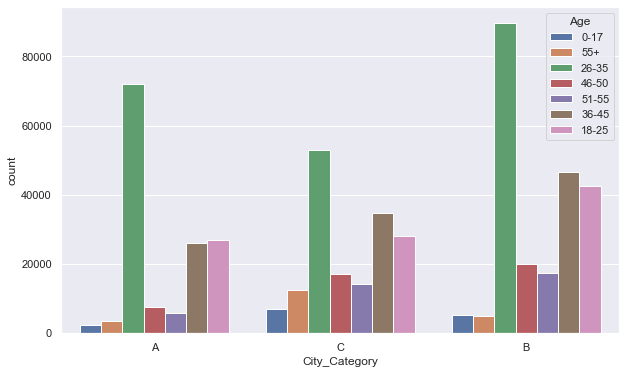

In [93]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x = df['City_Category'], hue=df['Age'])


##### Analyse purchase wrt stay in current city

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

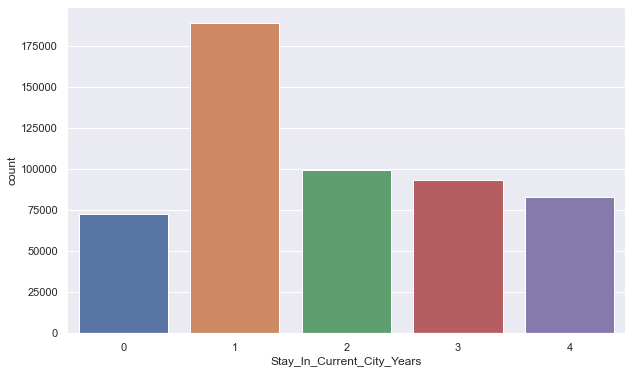

In [94]:
sns.countplot(x = df['Stay_In_Current_City_Years'])


<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

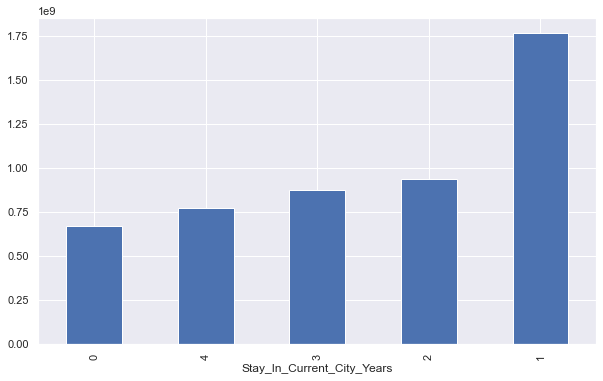

In [95]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].sort_values().plot(kind = 'bar')


<AxesSubplot:title={'center':'City Category'}, ylabel='Purchase'>

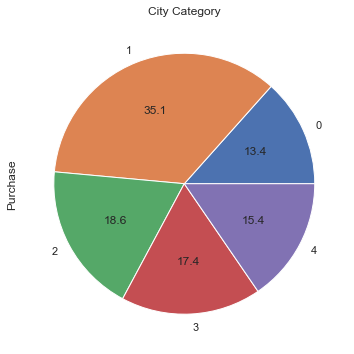

In [96]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'pie', autopct = '%.1f', 
                                 title = 'City Category', 
                                 figsize = (6,6))


##### Analyse Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

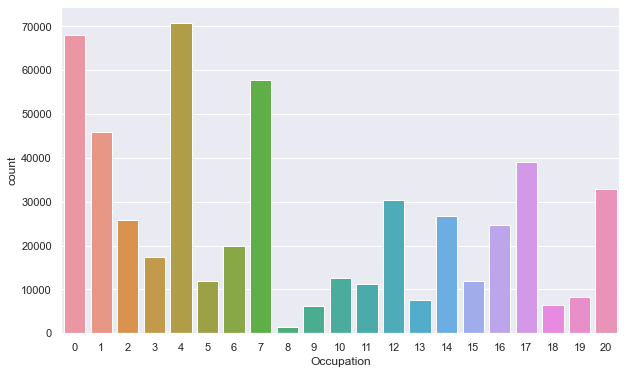

In [97]:
sns.countplot(x = df['Occupation'])


<AxesSubplot:xlabel='Occupation'>

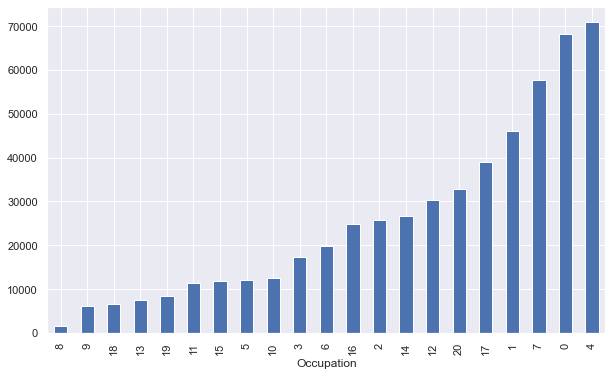

In [99]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')


<AxesSubplot:xlabel='Occupation', ylabel='count'>

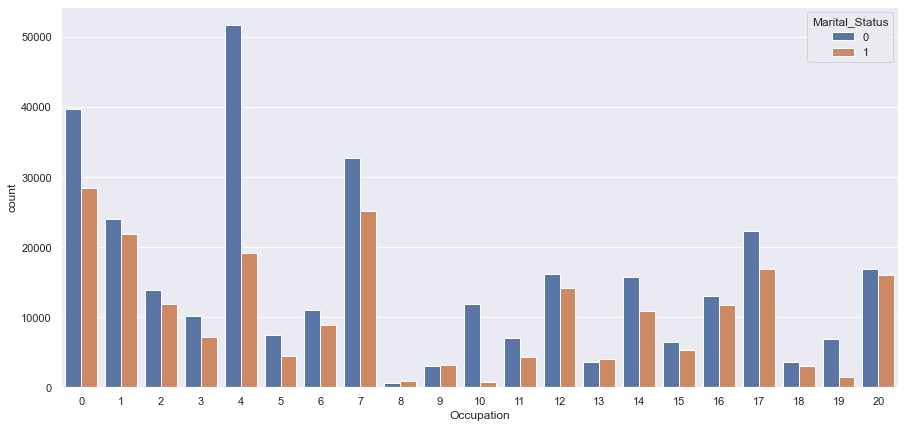

In [100]:
sns.set(rc = {'figure.figsize':(15,7)})

sns.countplot(x = df['Occupation'], hue= df['Marital_Status'])

<AxesSubplot:xlabel='Occupation'>

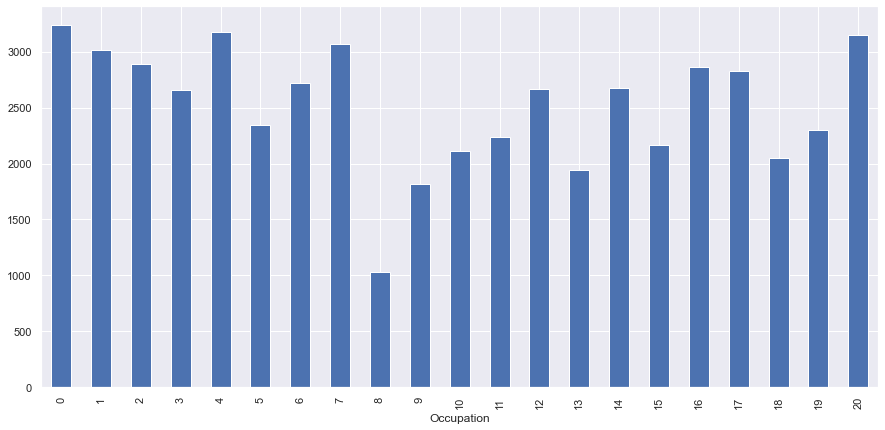

In [101]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')


<AxesSubplot:xlabel='Occupation'>

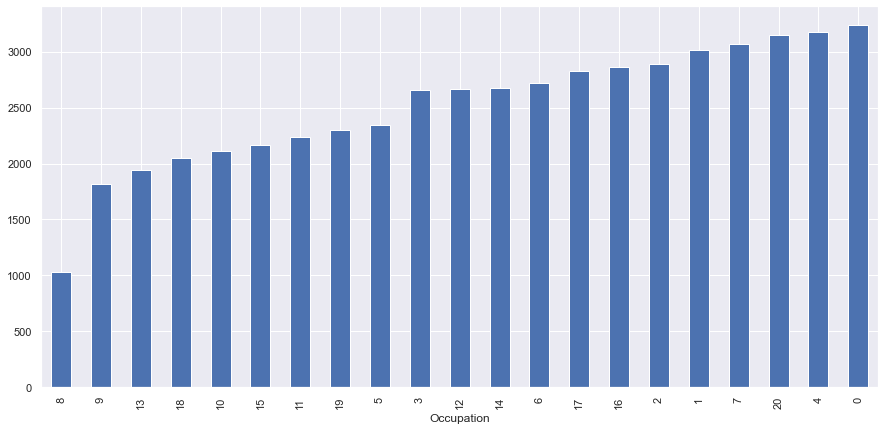

In [102]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')


##### Analyse product category

<AxesSubplot:xlabel='Product_Category_1'>

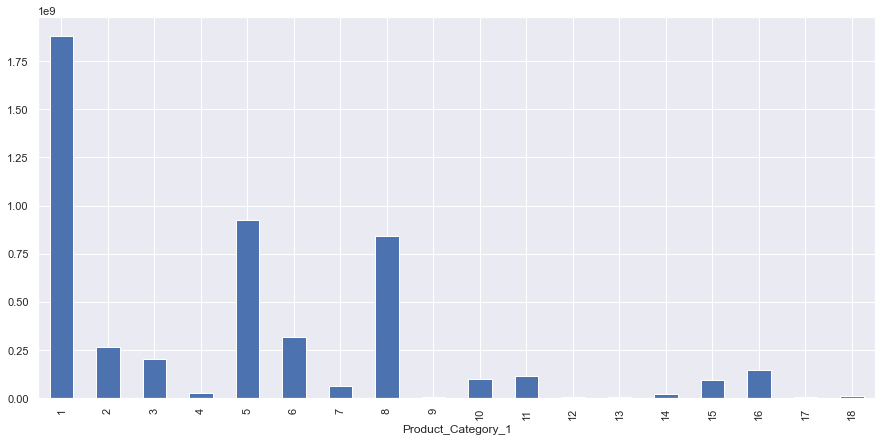

In [103]:
df.groupby('Product_Category_1')['Purchase'].sum().plot(kind = 'bar')


<AxesSubplot:xlabel='Product_Category_1'>

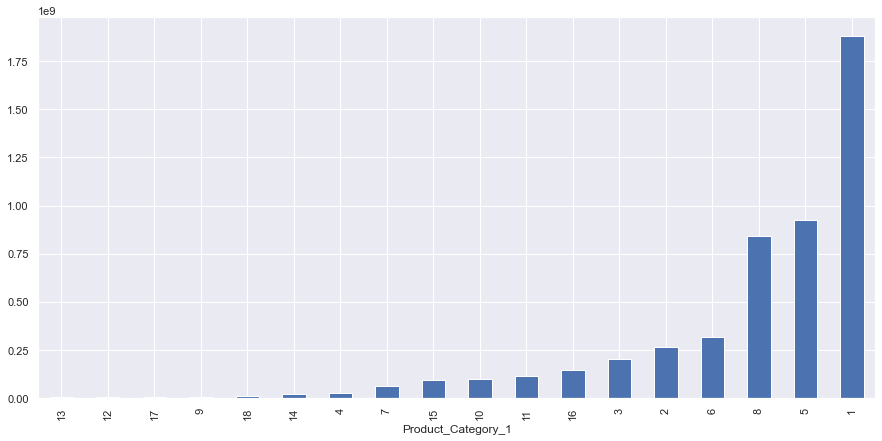

In [104]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind = 'bar')


<AxesSubplot:xlabel='Product_Category_1'>

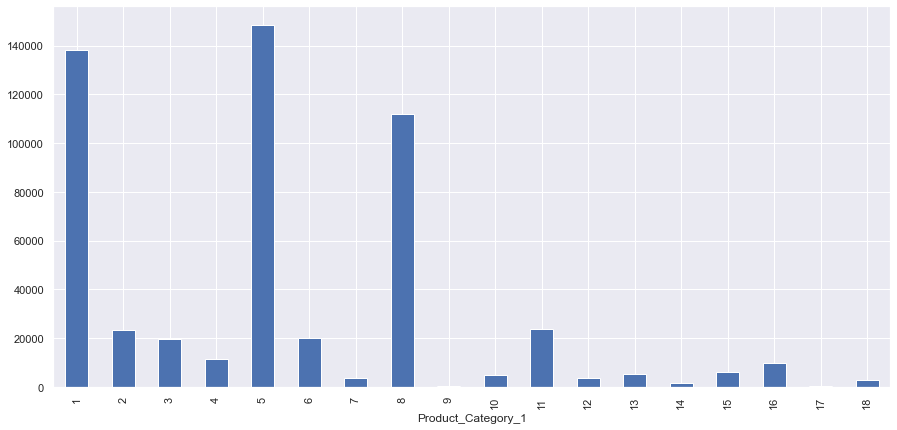

In [105]:
df.groupby('Product_Category_1')['Purchase'].size().plot(kind = 'bar')


<AxesSubplot:xlabel='Product_Category_1'>

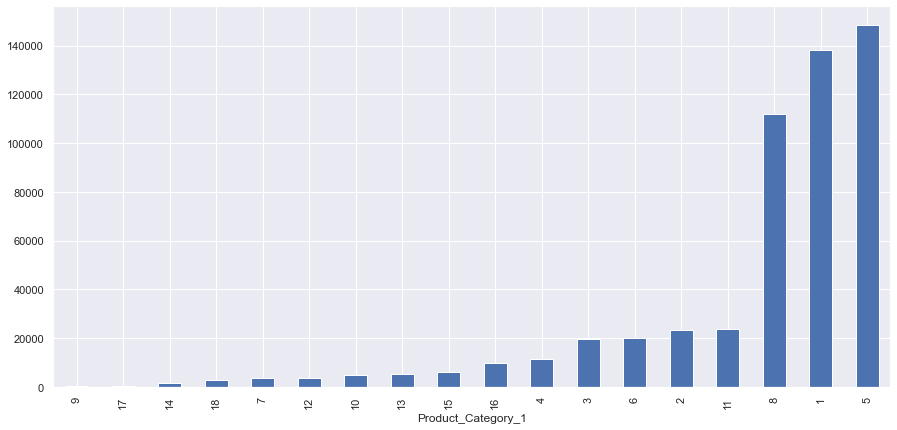

In [106]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')


<AxesSubplot:xlabel='Product_Category_1'>

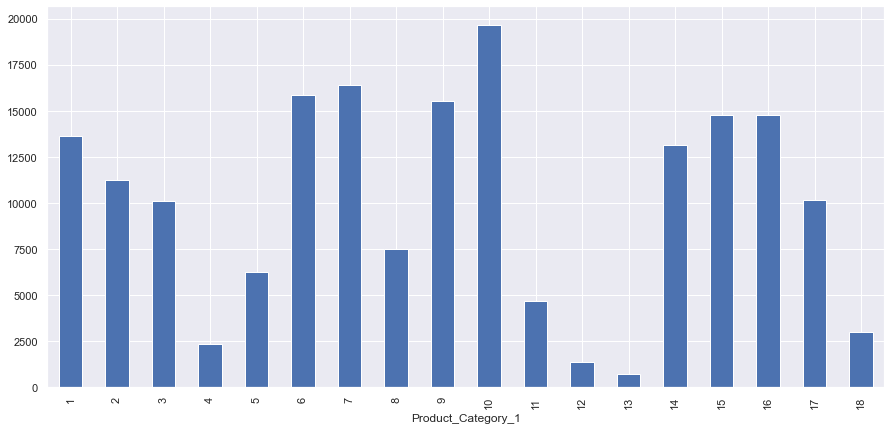

In [107]:
df.groupby('Product_Category_1')['Purchase'].mean().plot(kind = 'bar')


<AxesSubplot:xlabel='Product_Category_1'>

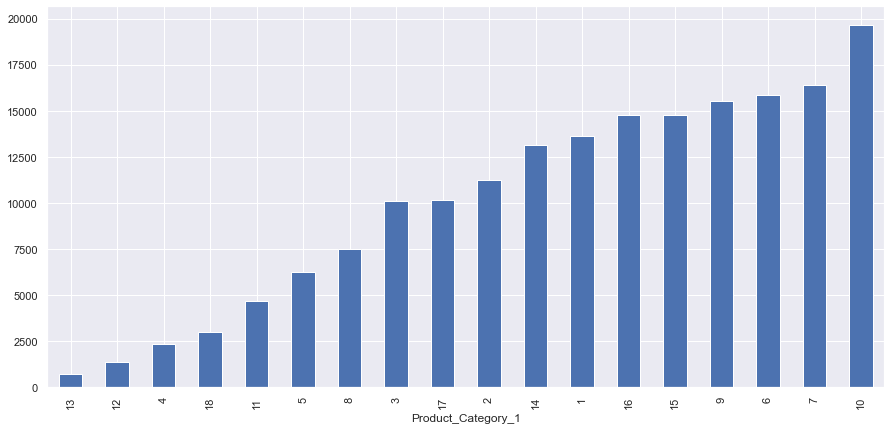

In [108]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind = 'bar')


##### Analyse product ID

<AxesSubplot:ylabel='Product_ID'>

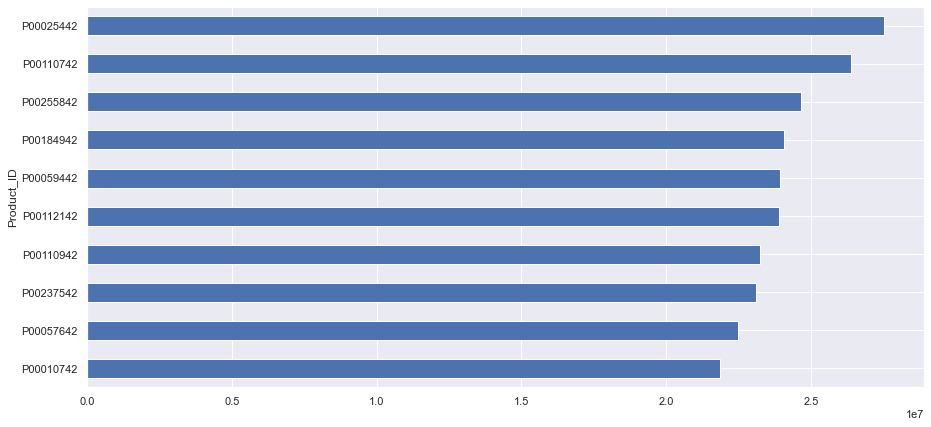

In [109]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind = 'barh')


<AxesSubplot:ylabel='Product_ID'>

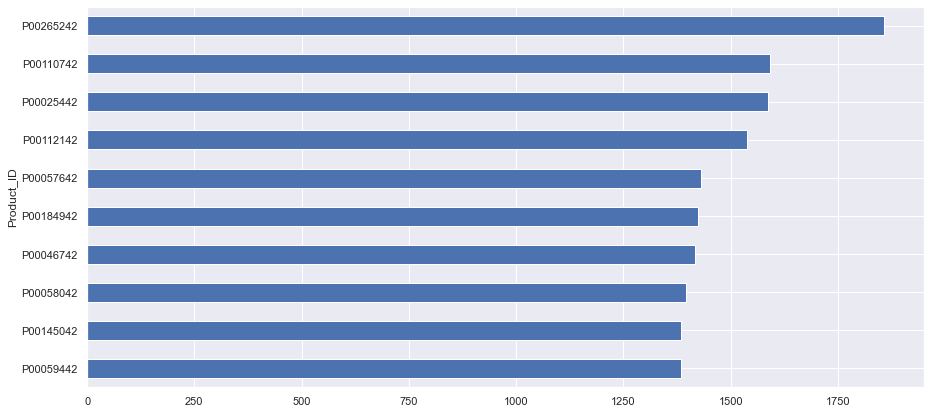

In [110]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'barh')


##### combining martial status and gender

In [79]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))




In [80]:
df['MaritalGender'] = l # 0 = unmarried,1 = Married

In [83]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

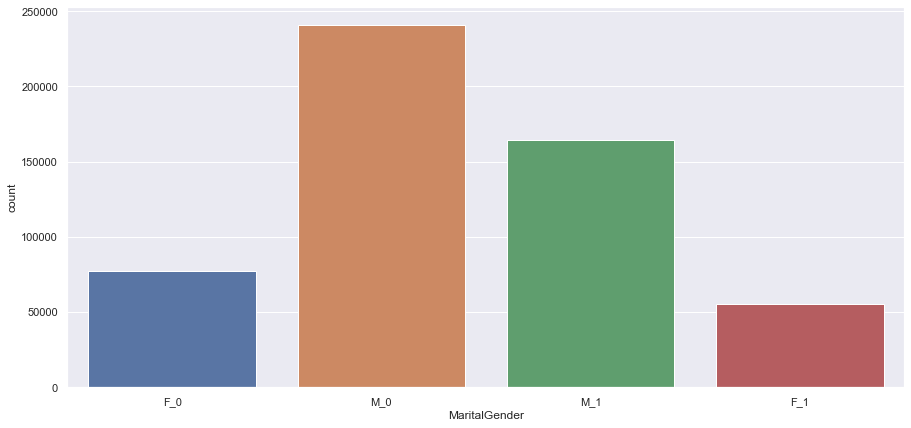

In [111]:
sns.countplot(x = df['MaritalGender'])


<AxesSubplot:xlabel='Age', ylabel='count'>

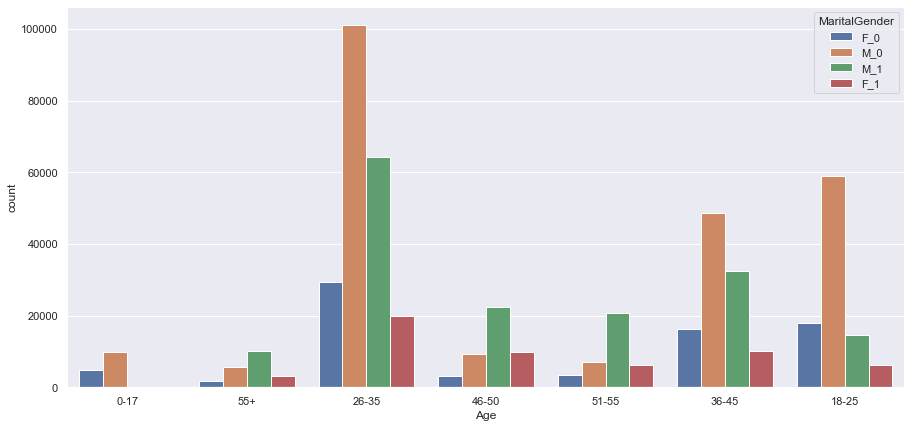

In [112]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

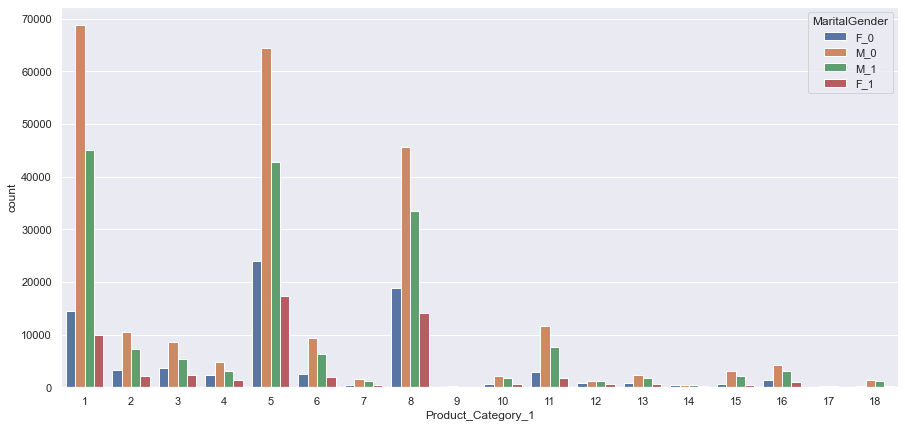

In [113]:
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

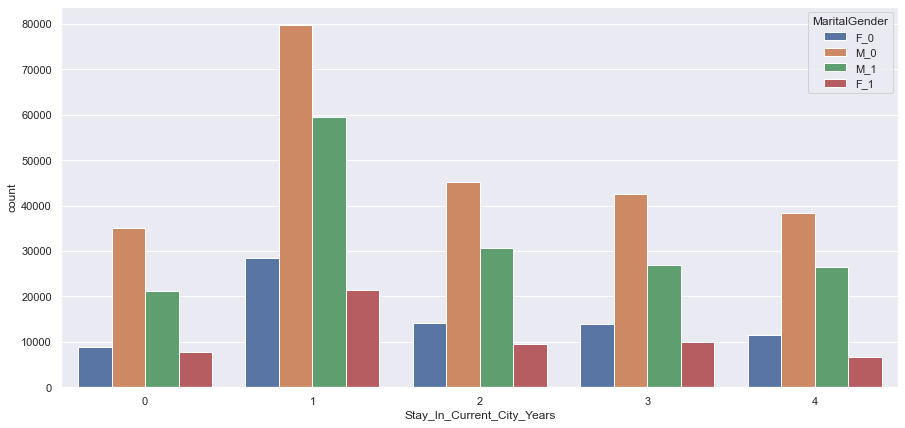

In [114]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])


<AxesSubplot:xlabel='City_Category', ylabel='count'>

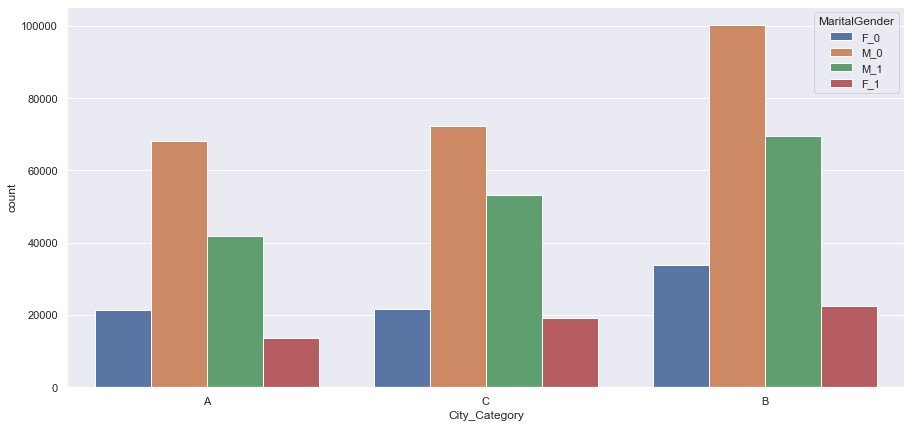

In [115]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])


<AxesSubplot:xlabel='Age', ylabel='count'>

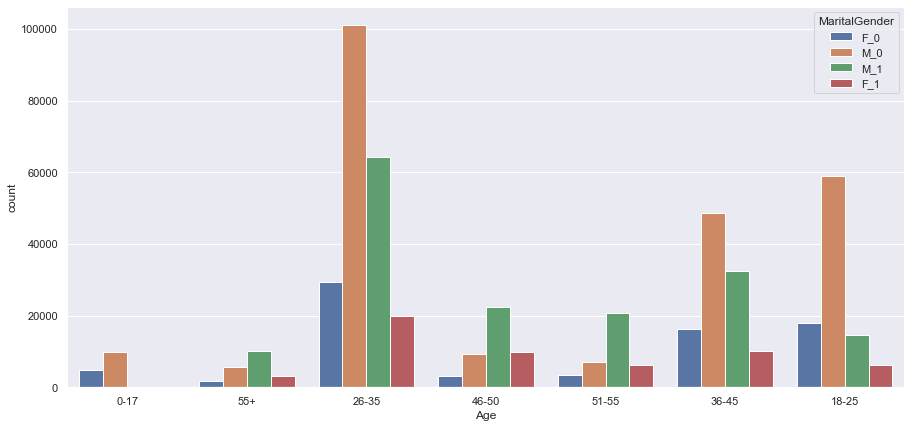

In [119]:
sns.countplot(x = df['Age'],hue=df['MaritalGender'])


##### Conclusion

In [ ]:
1.Men are more likely to spend on sales like Black Friday
2.People who are unmarried spend more on Black Friday
3.People of age group 26-35 spend more on Black Friday and kids are less likely to spend money on sales
4.People who are located in C spend more on purcahasing stuff on Black Friday
5.People of occupation type 0,4 and 7 spend more on Black Friday
6.People who are newly shifted in this city spend more on BF and people who are staying as guest in this city spend less on sales
7.Products P00025442 and P00110742 are very demanding
8.Irrespective of occupation the proportion of products being purchased is generic. i.e. category 1, 5 are most bought by customers of any occupation and similary, 13-18 categories are bought in less numbers compared to other products.
